In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob


In [73]:
# Load all CSV files and assign group labels
data_files = ['csv_files/als1.csv', 'csv_files/control1.csv', 'csv_files/hunt1.csv', 'csv_files/park1.csv']
data_list = []

for file in data_files:
    df = pd.read_csv(file)
    group = file.split("/")[-1].split("1")[0]  # Extract group name (als, control, hunt, park)
    if group == 'control':
        group = 'healthy'
    if group == 'hunt':
        group = 'huntington'
    if group == 'park':
        group = 'parkinsons'
    df["Group"] = group
    data_list.append(df)

# Combine all data
data = pd.concat(data_list, ignore_index=True)

In [74]:
data.columns

Index(['Elapsed_Time', 'Left_Stride_Interval', 'Right_Stride_Interval',
       'Left_Swing_Interval', 'Right_Swing_Interval',
       'Left_Swing_Interval_Percent', 'Right_Swing_Interval_Percent',
       'Left_Stance_Interval', 'Right_Stance_Interval',
       'Left_Stance_Interval_Percent', 'Right_Stance_Interval_Percent',
       'Double_Support_Interval_Sec', 'Double_Support_Interval_Percent',
       'Group'],
      dtype='object')

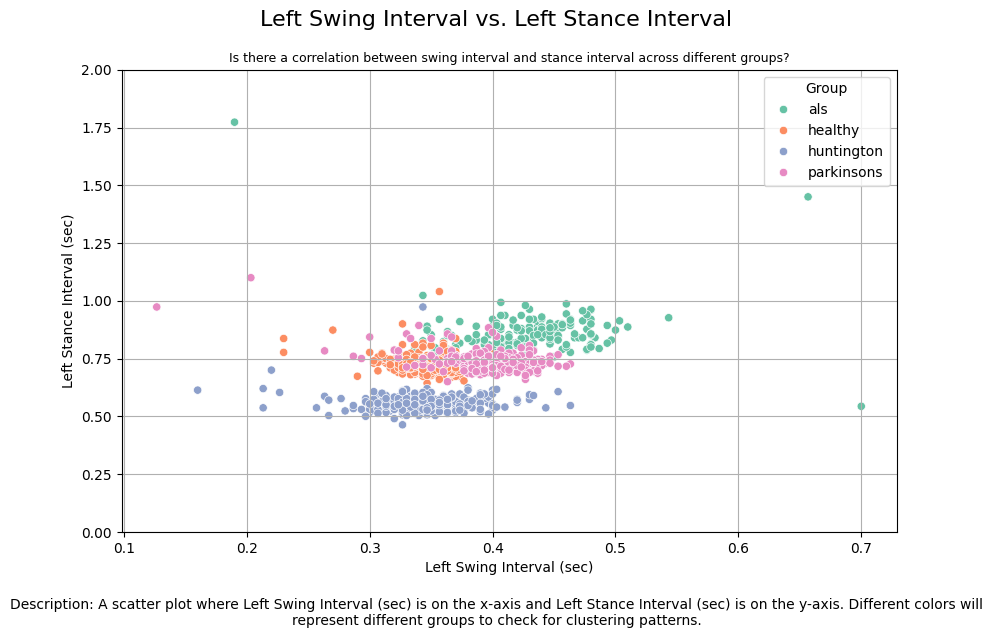

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Left_Swing_Interval', y='Left_Stance_Interval', hue='Group', data=data, palette='Set2')
plt.suptitle('Left Swing Interval vs. Left Stance Interval', fontsize=16)
plt.title('Is there a correlation between swing interval and stance interval across different groups?', fontsize=9)
plt.xlabel('Left Swing Interval (sec)')
plt.ylabel('Left Stance Interval (sec)')
plt.legend(title='Group')
plt.figtext(0.5, 0, 'Description: A scatter plot where Left Swing Interval (sec) is on the x-axis and Left Stance Interval (sec) is on the y-axis. Different colors will represent different groups to check for clustering patterns.', 
            ha='center', va='top', fontsize=10, wrap=True)
plt.grid()
plt.ylim(0, 2)
plt.show()

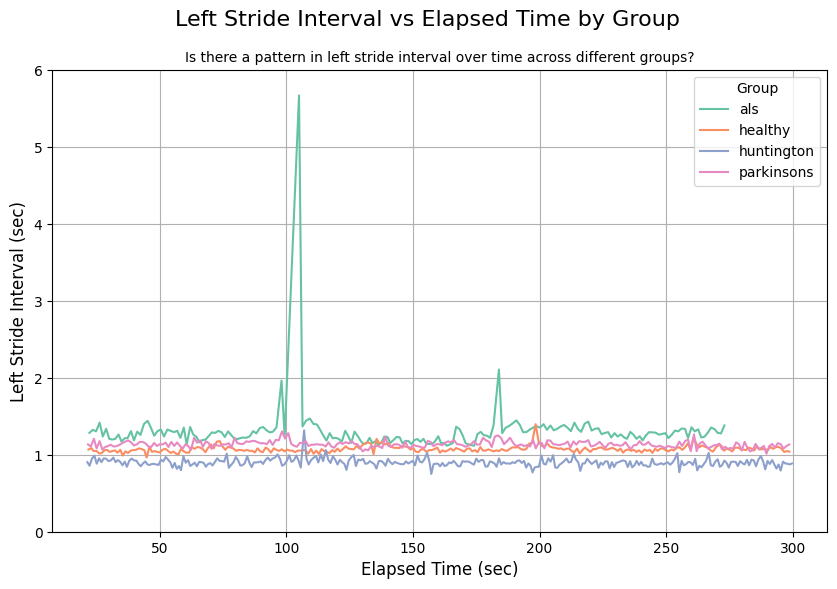

In [97]:
plt.figure(figsize=(10, 6))

sns.lineplot(x='Elapsed_Time', y='Left_Stride_Interval', hue='Group', data=data, palette='Set2')

plt.suptitle('Left Stride Interval vs Elapsed Time by Group', fontsize=16)
plt.title('Is there a pattern in left stride interval over time across different groups?', fontsize=10)
plt.xlabel('Elapsed Time (sec)', fontsize=12)
plt.ylabel('Left Stride Interval (sec)', fontsize=12)
plt.grid()

plt.ylim(0, 6)

plt.show()

In [98]:
# plt.figure(figsize=(10, 6))

# sns.lineplot(x='Elapsed_Time', y='Right_Stride_Interval', hue='Group', data=data, palette='Set2')

# plt.suptitle('Right Stride Interval vs Elapsed Time by Group', fontsize=16)
# plt.title('Is there a pattern in right stride interval over time across different groups?', fontsize=10)
# plt.xlabel('Elapsed Time (sec)', fontsize=12)
# plt.ylabel('Right Stride Interval (sec)', fontsize=12)
# plt.grid()

# plt.ylim(0, 6)

# plt.show()

In [8]:
data

,Elapsed_Time,Left_Stride_Interval,Right_Stride_Interval,Left_Swing_Interval,Right_Swing_Interval,Left_Swing_Interval_Percent,Right_Swing_Interval_Percent,Left_Stance_Interval,Right_Stance_Interval,Left_Stance_Interval_Percent,Right_Stance_Interval_Percent,Double_Support_Interval_Sec,Double_Support_Interval_Percent,Group
0,22.3200,1.2833,1.3533,0.4067,0.4133,31.69,30.54,0.8767,0.9400,68.31,69.46,0.4633,36.10,als
1,23.6433,1.3233,1.2667,0.4833,0.4000,36.52,31.58,0.8400,0.8667,63.48,68.42,0.4400,33.25,als
2,24.9467,1.3033,1.3600,0.4500,0.4267,34.53,31.37,0.8533,0.9333,65.47,68.63,0.4267,32.74,als
3,26.3633,1.4167,1.2833,0.5033,0.3667,35.53,28.57,0.9133,0.9167,64.47,71.43,0.5467,38.59,als
4,27.6000,1.2367,1.4067,0.3467,0.3567,28.03,25.36,0.8900,1.0500,71.97,74.64,0.5333,43.13,als
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,294.0400,1.1500,1.1667,0.4167,0.3933,36.23,33.71,0.7333,0.7733,63.77,66.29,0.3400,29.57,parkinsons
1004,295.1767,1.1367,1.1167,0.4233,0.3500,37.24,31.34,0.7133,0.7667,62.76,68.66,0.3633,31.96,parkinsons
1005,296.2567,1.0800,1.1267,0.3867,0.3367,35.80,29.88,0.6933,0.7900,64.20,70.12,0.3567,33.02,parkinsons
1006,297.3667,1.1100,1.1067,0.4000,0.3500,36.04,31.63,0.7100,0.7567,63.96,68.37,0.3600,32.43,parkinsons
